### <span style="color:red">Importing Libraries</span> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
plt.style.use('seaborn')
from pylab import rcParams  # for plotting box plot, to check outliers

#model developemnt libraries
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

### <span style="color:red">Reading file</span>

In [2]:
df = pd.read_csv('winequality-red.csv')

### <span style="color:red">Getting overview of features and type of data present in features using head() and tail()</span>  

In [3]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [4]:
df.tail(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1589            6.6             0.725         0.20             7.8      0.073   
1590            6.3             0.550         0.15             1.8      0.077   
1591            5.4             0.740         0.09             1.7      0.089   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1589                 29.0                  79.0  0.99770  3.29       0.54   
1590                 26.0                  35.0  0.99314  3.32       0.82   
1591                 16.0                  26.0  0.99402  3.67       0.56   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1589      9.2        5  
1590     11.6        6  
1591     11.6        6  
1592     11.0        6  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

###  <span style="color:red">Checking shape of data</span>

In [5]:
print(f'Number of rows and columns in data set are {df.shape}')

Number of rows and columns in data set are (1599, 12)


### <span style="color:red">Checking Null Values count and data type of features in whole data set</span>

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### <span style="color:green">From above results, it is clear that, there are no null values in data set</span>

In [7]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### <span style="color:red">Checking data type of features</span>

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### <span style="color:green">We have continuous data in all features.</span>

### <span style="color:red">Checking total Qualities/ranks present for feature name "quality"</span>

In [9]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

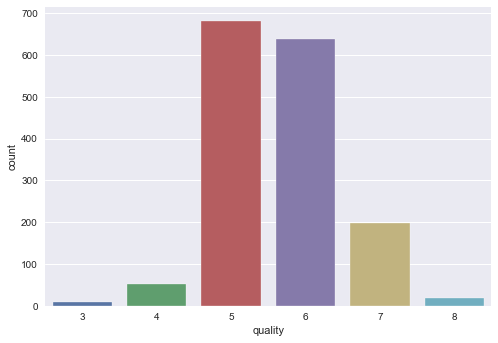

In [10]:
sns.countplot(df['quality'])

### <span style="color:green">We have to divide quality of wine into two groups as good (3,4,5) or bad (6,7,8). This leads us to bi-variate classification analysis.</span>


# <span style="color:red">Removing Outliers</span>

<AxesSubplot:>

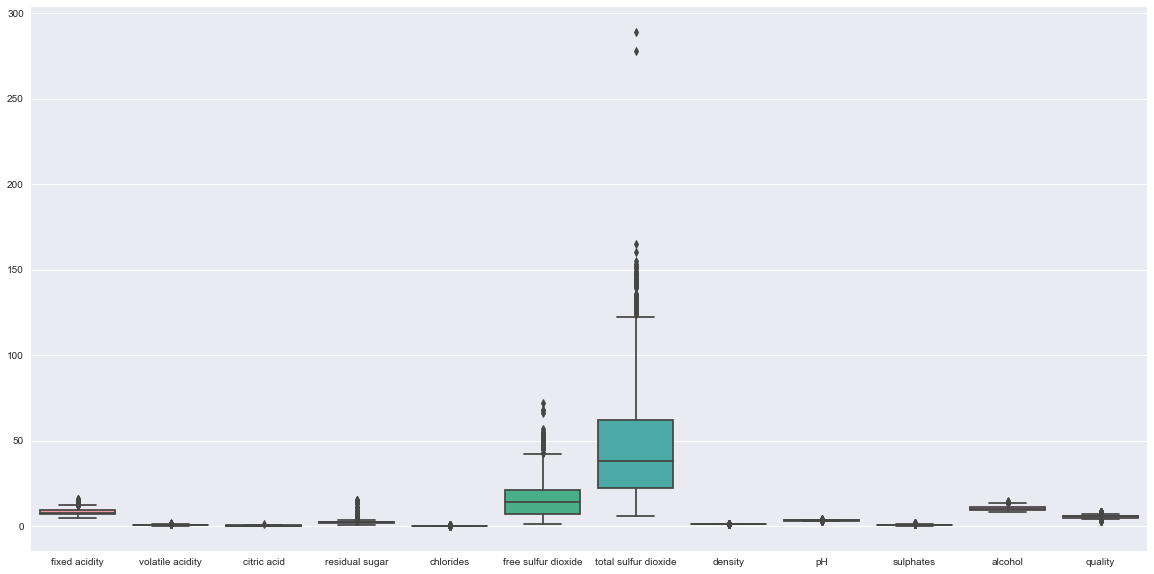

In [11]:
rcParams['figure.figsize'] = 20, 10
sns.boxplot(data = df)

### <span style="color:green">From graph it is clear that, outliers presnet in data set, and should be removed</span>

In [12]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [13]:
df_new=df[(z<3).all(axis=1)]
df_new.shape
df.shape

(1599, 12)

### Checking skewness of data

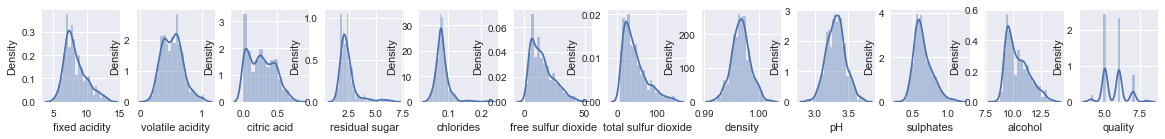

In [14]:
collist = df.columns.values
nrows, ncol = 10, 12

plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_new[collist[i]])

In [15]:
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

<AxesSubplot:>

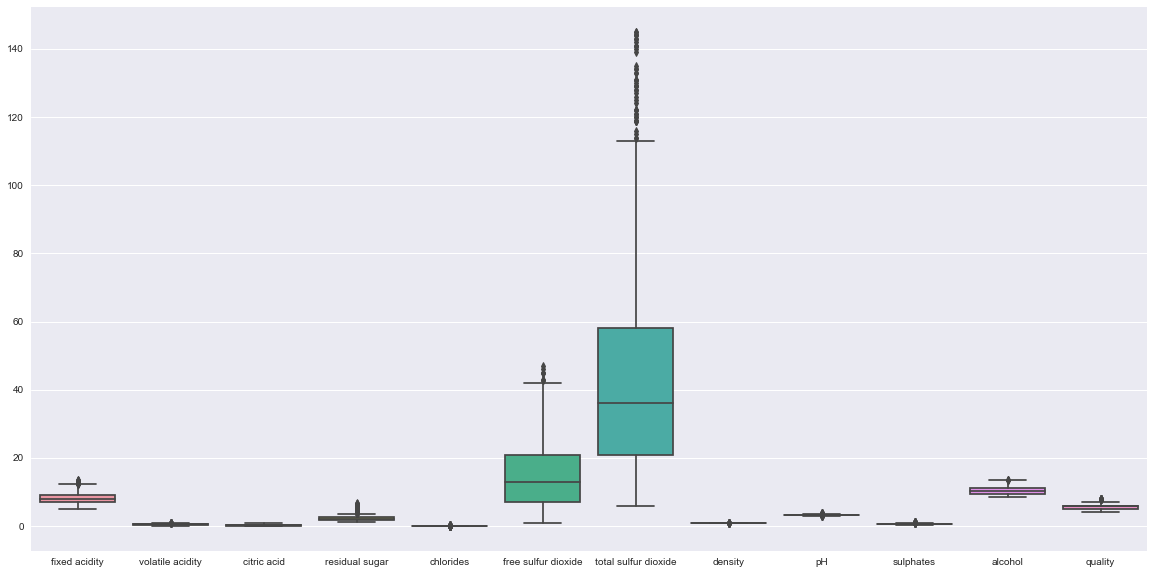

In [16]:
rcParams['figure.figsize'] = 20, 10
sns.boxplot(data = df_new)

### <span style="color:green">From above grpah, it is clear that now, there are no outliers in data </span>

In [17]:
df_new.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1451.000000       1451.000000  1451.000000     1451.000000   
mean        8.310062          0.522950     0.265382        2.387285   
std         1.646458          0.168531     0.190934        0.862078   
min         5.000000          0.120000     0.000000        1.200000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.200000          0.630000     0.420000        2.600000   
max        13.500000          1.040000     0.790000        6.700000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1451.000000          1451.000000           1451.000000  1451.000000   
mean      0.081425            15.104755             43.735355     0.996710   
std       0.020966             9.309768             29.441284     0.001716   
min       0.038000             1.000000              6.000000     0.991500   
25%       0.070000             7.000000             21.000000     0.995600   
50%       0.079000            13.000000             36.000000     0.996700   
75%       0.089000            21.000000             58.000000     0.997800   
max       0.226000            47.000000            145.000000     1.002200   

                pH    sulphates      alcohol      quality  
count  1451.000000  1451.000000  1451.000000  1451.000000  
mean      3.315934     0.642584    10.421089     5.659545  
std       0.141096     0.129801     1.021588     0.781605  
min       2.880000     0.330000     8.500000     4.000000  
25%       3.220000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.720000    11.100000     6.000000  
max       3.750000     1.160000    13.600000     8.000000

# <span style="color:red">Data Visualization</span>

### <span style="color:red">Checking relation of numerical data with each other, i.e. checking correlation matrix and plotting heat map</span>

<AxesSubplot:>

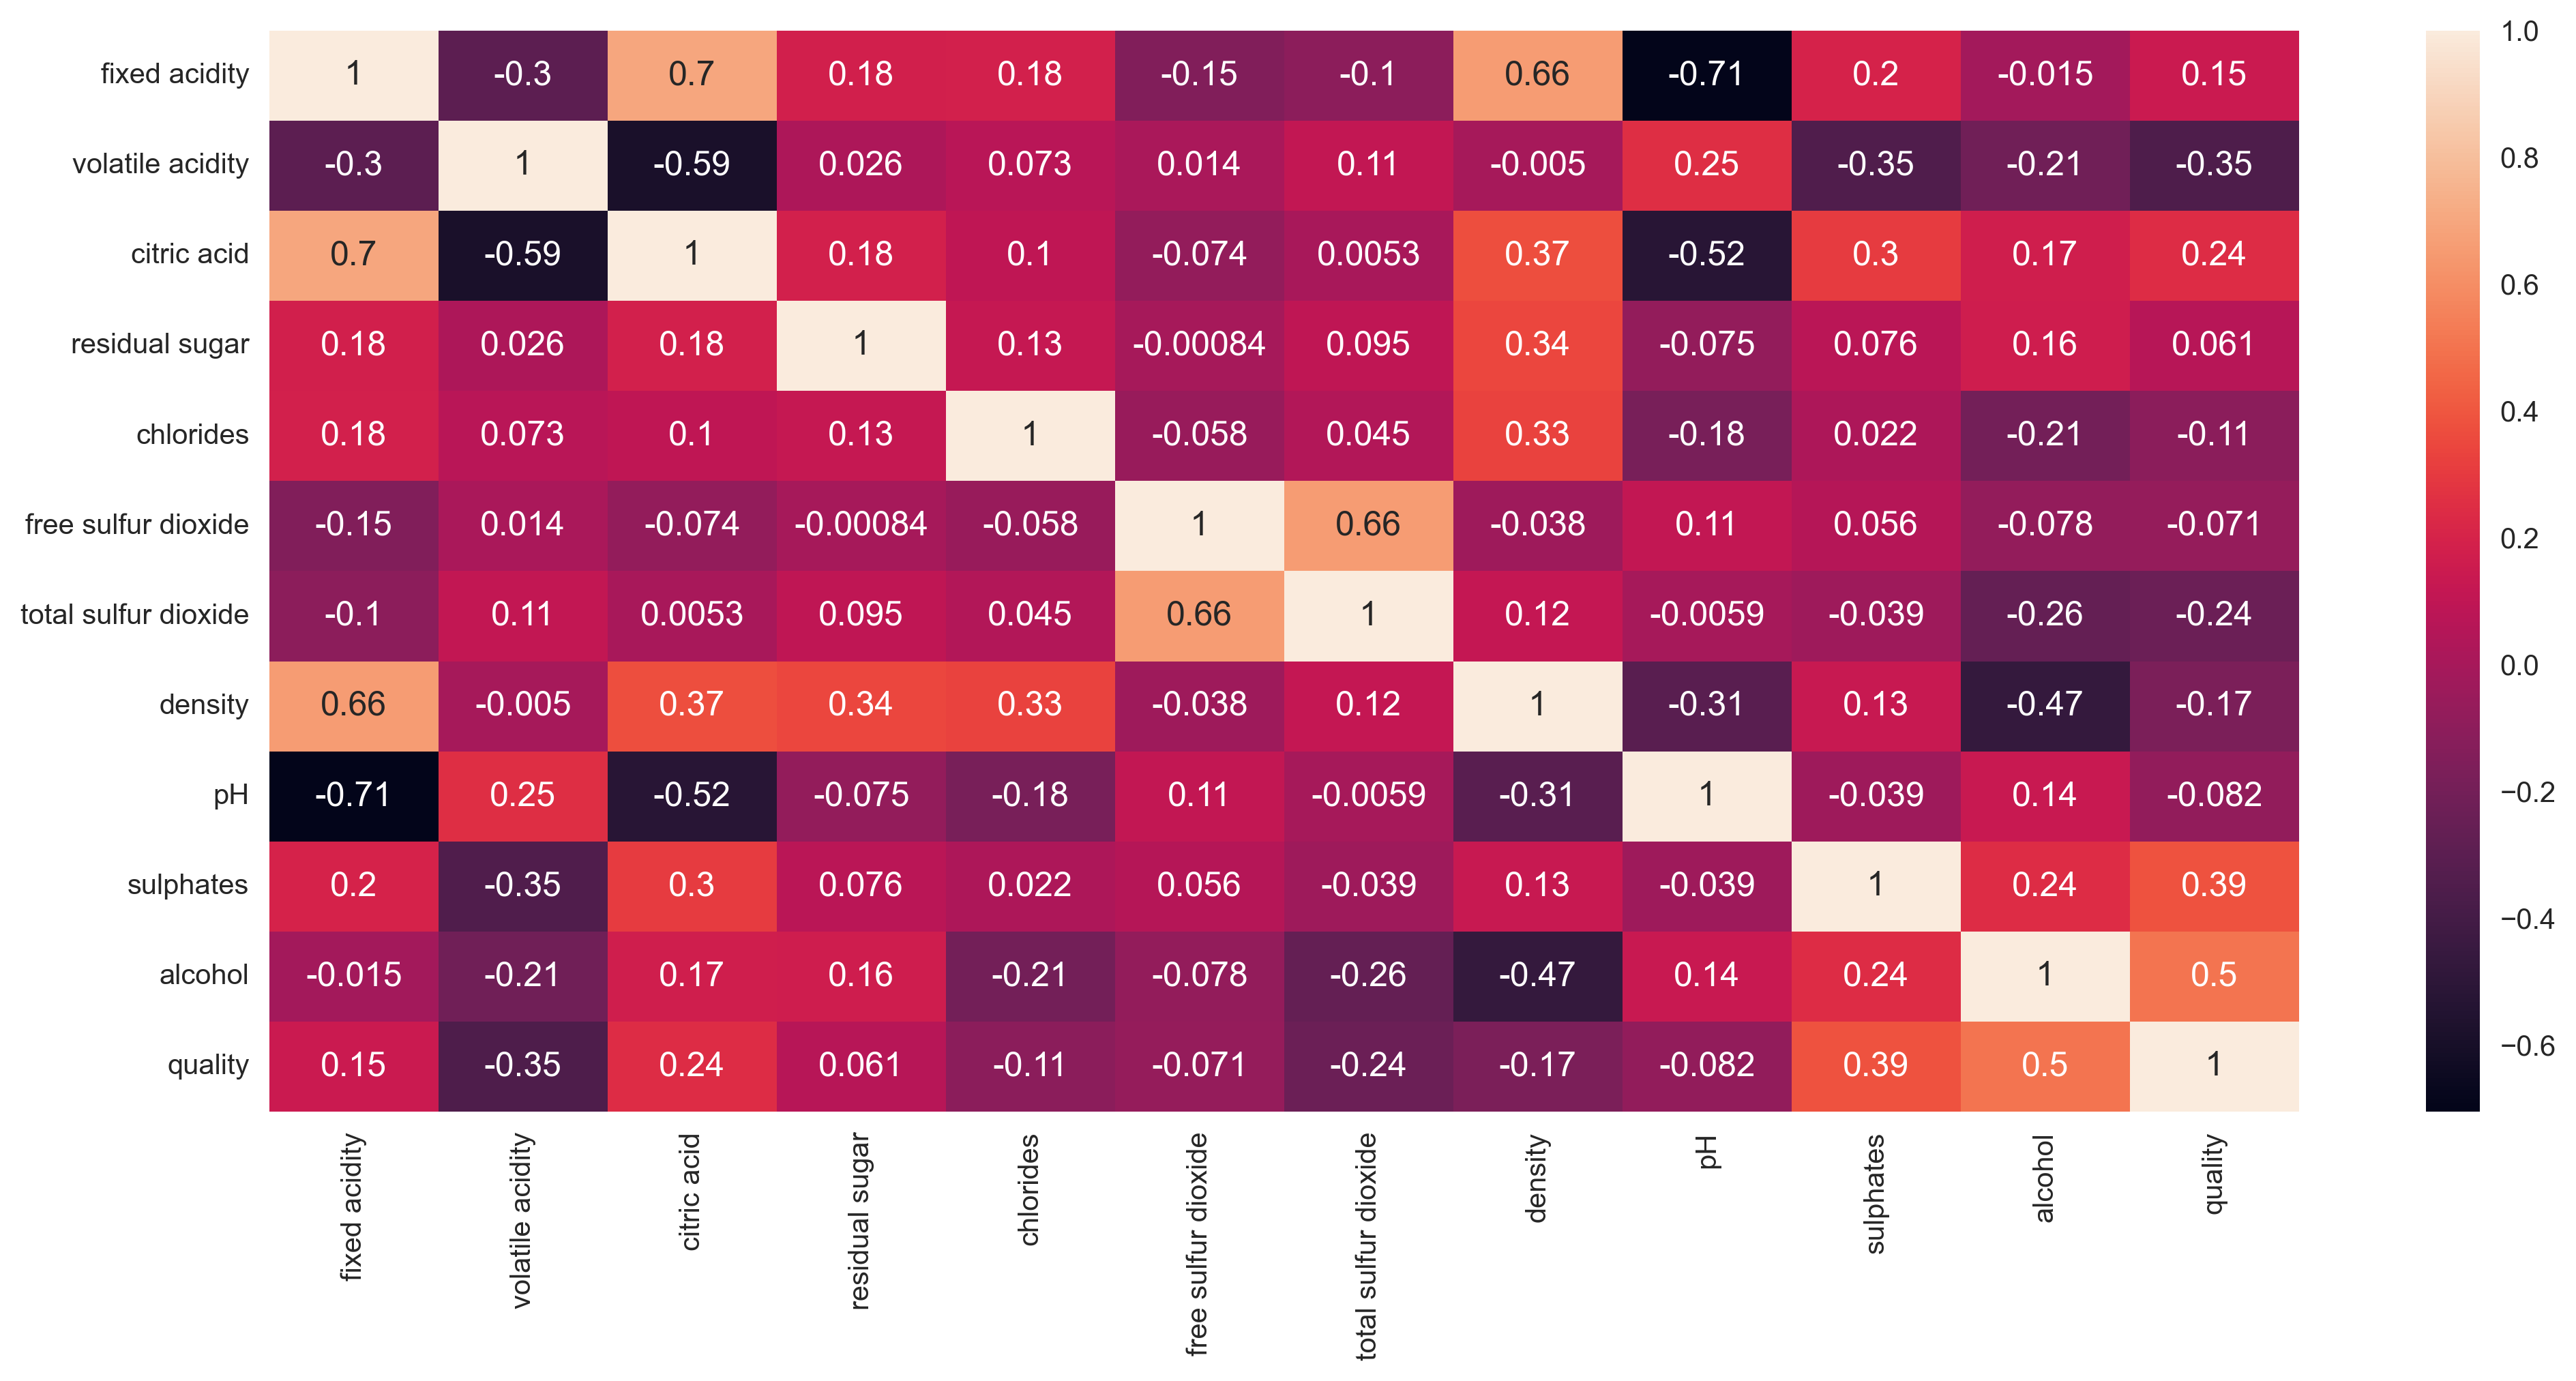

In [18]:
plt.figure(figsize=(16, 7), dpi=300)
sns.heatmap(df_new.corr(), annot=True)

<Figure size 6000x3000 with 0 Axes>

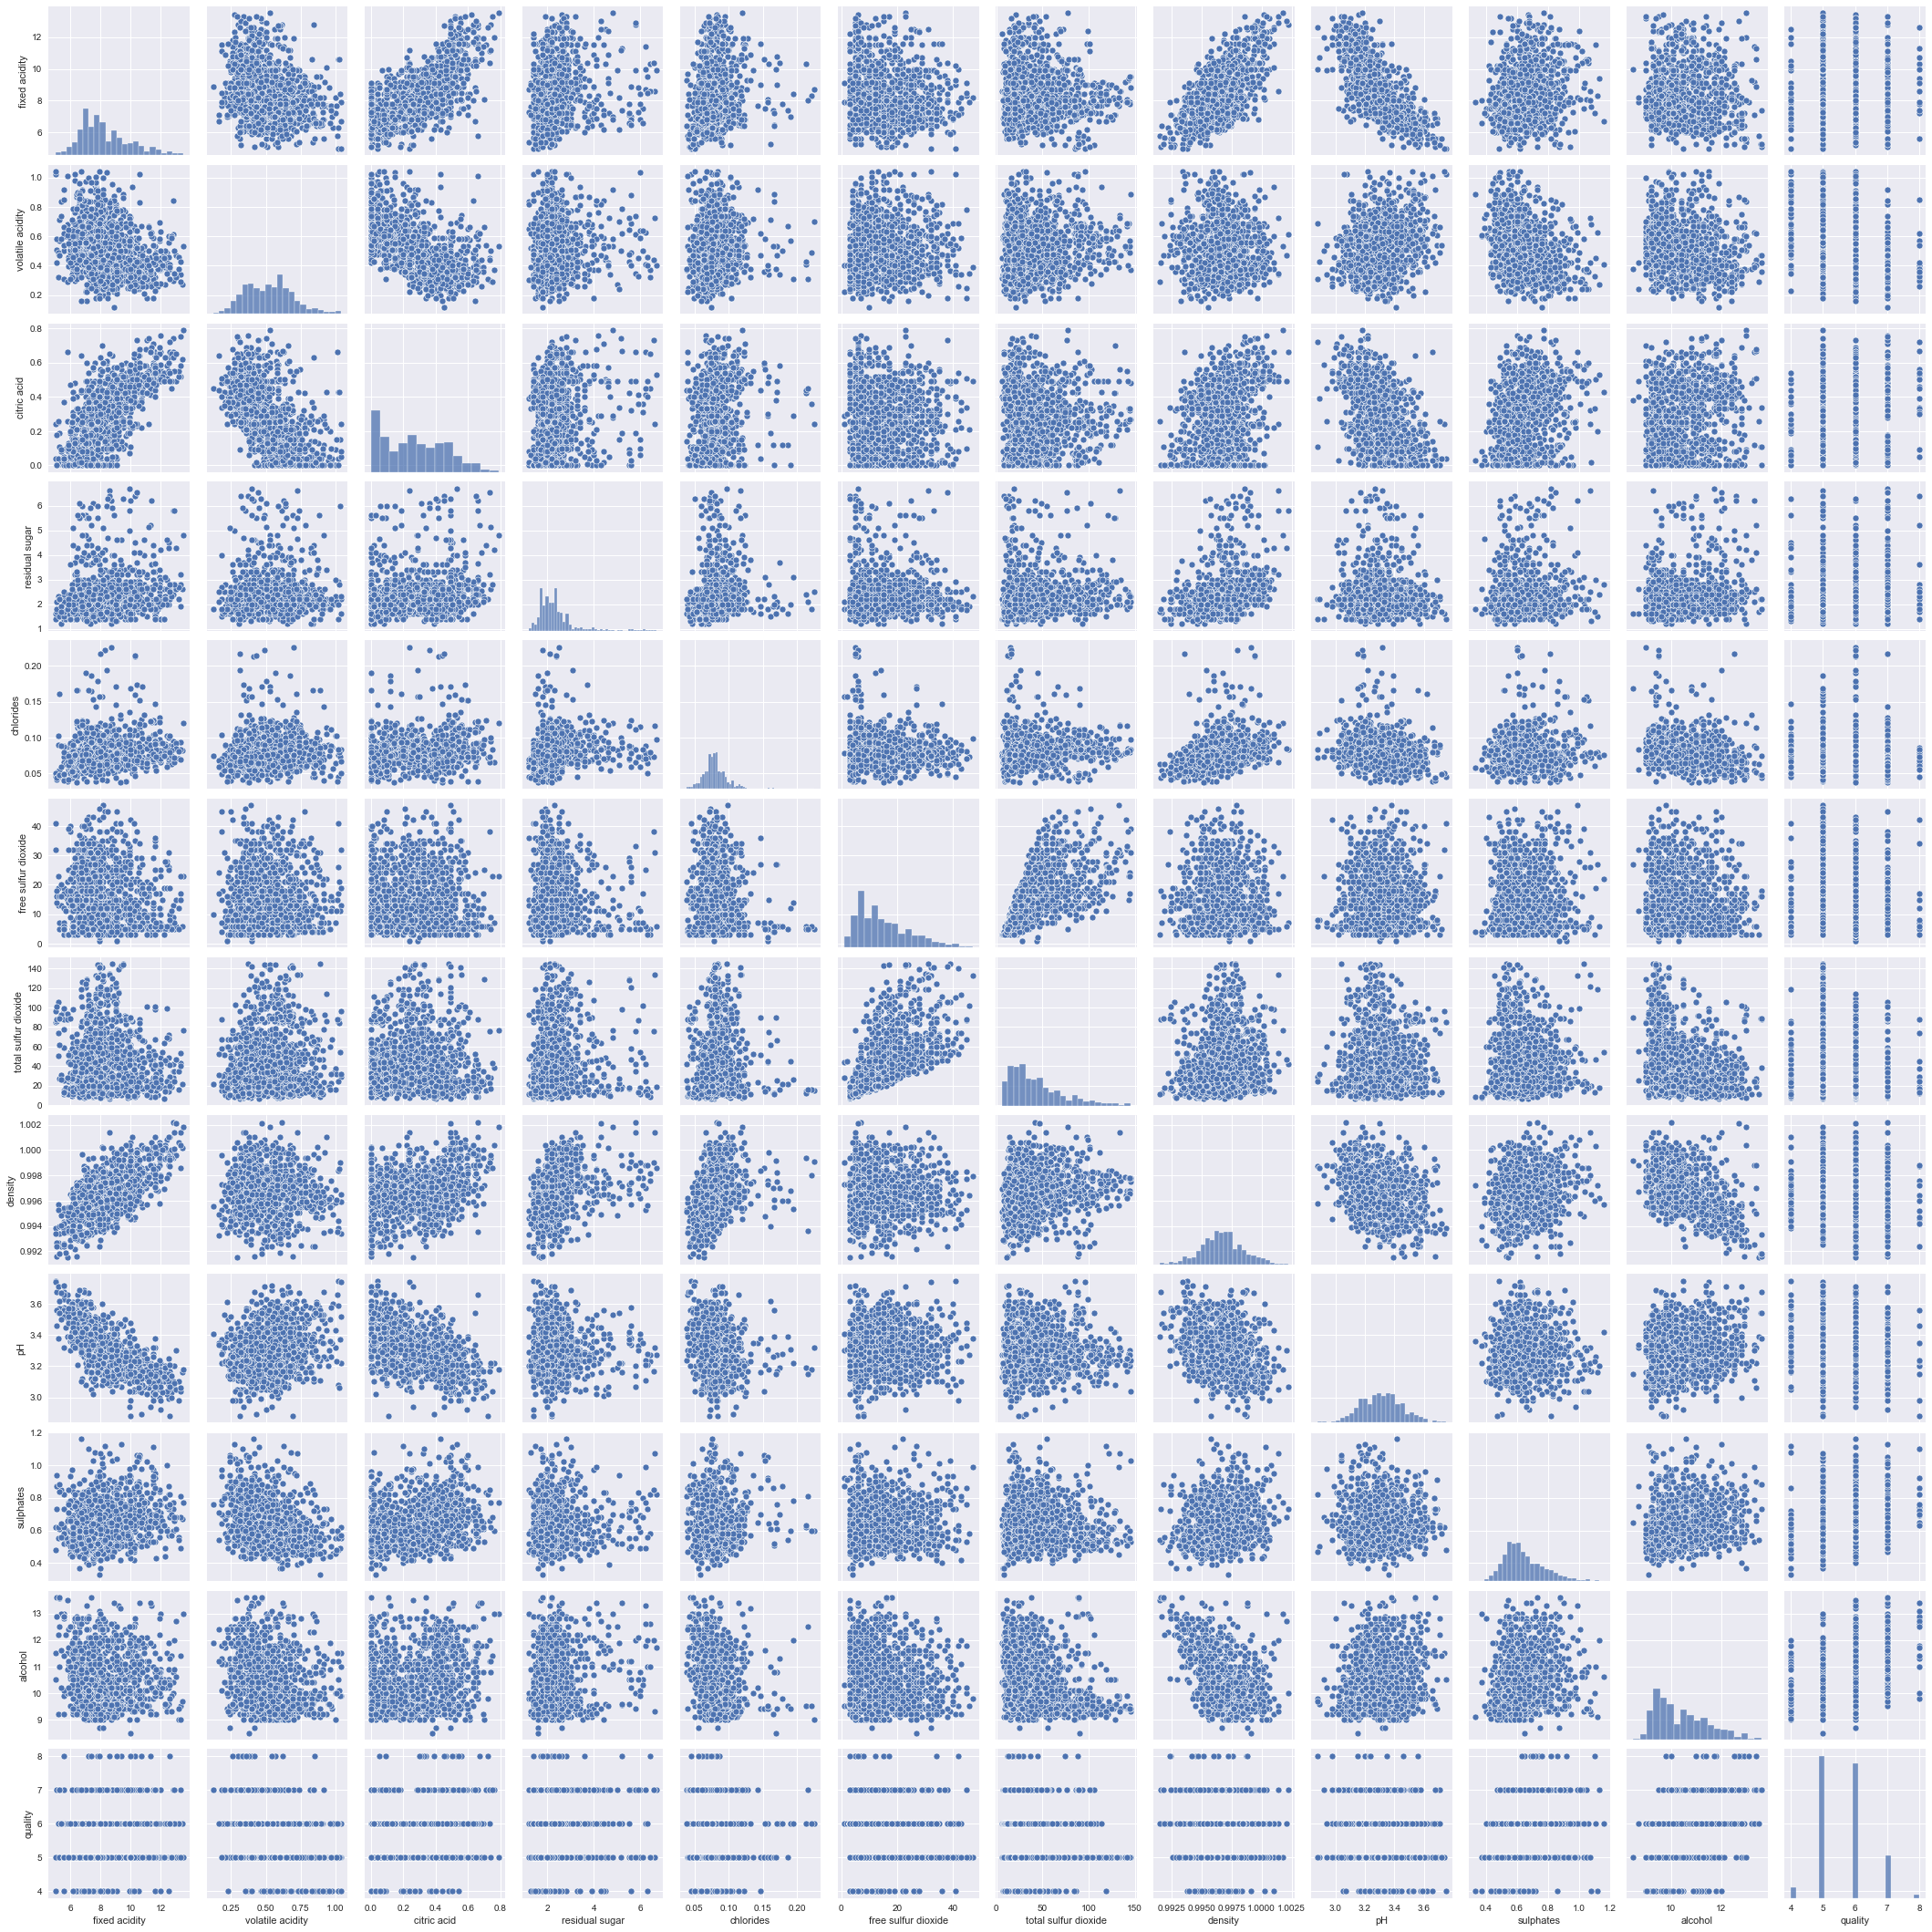

In [19]:
# Visualizing the same in scatter plot
plt.figure(dpi=300)
sns.pairplot(df_new)

### <span style="color:green">Strong Positive Correlation - citric acid and fixed acidity, free sulphur dioxide and total sulphor dioxide, alcohol and quality, fixed acidity and density</span>

### <span style="color:green">Strong Negative Correleation - citric acid and volatile acidity, fixed acidity and ph, density and alcohol.</span>

In [20]:
# It is clear that feature pH has no significant impact on quality of wine. So it is good to drop df['pH'] from data set
df_new.drop('pH',axis=1,inplace=True)

### <span style="color:red">Checking the effect of chlorides and alcohol on quality of wine</span>

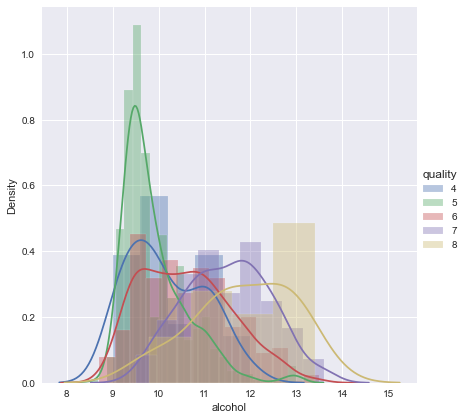

In [21]:
sns.FacetGrid(df_new,hue='quality',size=6).map(sns.distplot,'alcohol').add_legend()

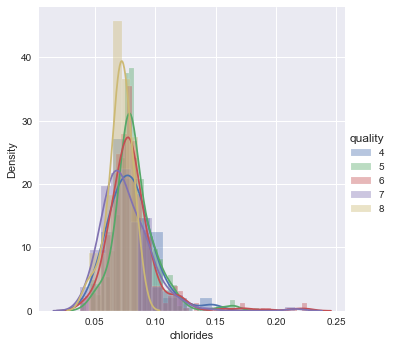

In [22]:
sns.FacetGrid(df_new,hue='quality',size=5).map(sns.distplot,'chlorides').add_legend()

### <span style="color:green">From above figure we can conclude that, increasing value of chloride has adverse effect on quality of wine.</span>
### <span style="color:green">Whereas, increasing quality of alcohol, improves quality of wine.</span>

# <span style="color:green">Mapping the data</span>

In [23]:
bins=(2,6,8)
group=['Bad','Good']
df_new['quality']=pd.cut(df_new['quality'],bins=bins,labels=group)
#now assign kabels to quality
label_quality=LabelEncoder()
#Bad becomes 0,and good becomes 1
df_new['quality']=label_quality.fit_transform(df_new['quality'])

In [24]:
df_new['quality'].value_counts()

0    1250
1     201
Name: quality, dtype: int64

# <span style="color:red">Building a Machine Learning Model</span>

In [25]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [26]:
#removal of skew-ness using log function
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [27]:
x.skew()

fixed acidity           0.427066
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.541853
chlorides               2.074343
free sulfur dioxide    -0.167401
total sulfur dioxide   -0.052860
density                 0.055738
sulphates               0.667517
alcohol                 0.606101
dtype: float64

### Splitting data into train (0.8) and test (0.2)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

### To get optimized result, applying Standard Scaling

In [29]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Algorithms to apply

In [30]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

# Preparing Models

In [31]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))

************** DecisionTreeClassifier ***********


DecisionTreeClassifier()


accuracy score 0.8316151202749141
Cross-val-score= 0.8810344827586206


roc_auc_score 0.6953441295546559


              precision    recall  f1-score   support

           0       0.91      0.89      0.90       247
           1       0.45      0.50      0.47        44

    accuracy                           0.83       291
   macro avg       0.68      0.70      0.69       291
weighted avg       0.84      0.83      0.84       291



[[220  27]
 [ 22  22]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


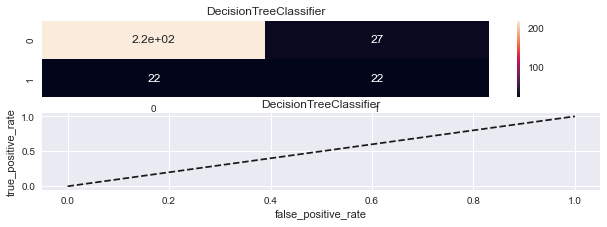

************** RandomForestClassifier ***********


RandomForestClassifier()


accuracy score 0.9003436426116839
Cross-val-score= 0.9112068965517242


roc_auc_score 0.7078119249171881


              precision    recall  f1-score   support

           0       0.91      0.98      0.94       247
           1       0.83      0.43      0.57        44

    accuracy                           0.90       291
   macro avg       0.87      0.71      0.76       291
weighted avg       0.89      0.90      0.89       291



[[243   4]
 [ 25  19]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


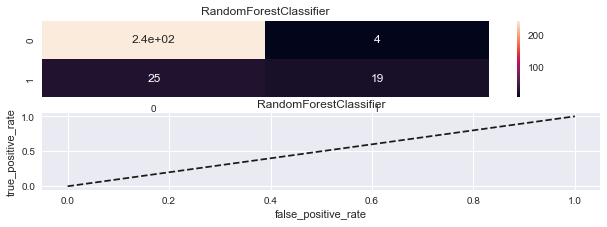

************** KNeighborsClassifier ***********


KNeighborsClassifier()


accuracy score 0.8969072164948454
Cross-val-score= 0.8715517241379309


roc_auc_score 0.715126978284873


              precision    recall  f1-score   support

           0       0.91      0.98      0.94       247
           1       0.77      0.45      0.57        44

    accuracy                           0.90       291
   macro avg       0.84      0.72      0.76       291
weighted avg       0.89      0.90      0.89       291



[[241   6]
 [ 24  20]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


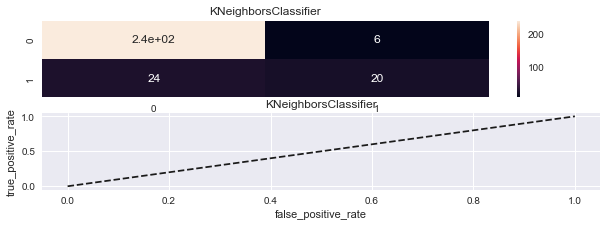

************** SGDClassifier ***********


SGDClassifier()


accuracy score 0.8419243986254296
Cross-val-score= 0.8448275862068966


roc_auc_score 0.7107563489142438


              precision    recall  f1-score   support

           0       0.91      0.90      0.91       247
           1       0.48      0.52      0.50        44

    accuracy                           0.84       291
   macro avg       0.70      0.71      0.70       291
weighted avg       0.85      0.84      0.84       291



[[222  25]
 [ 21  23]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


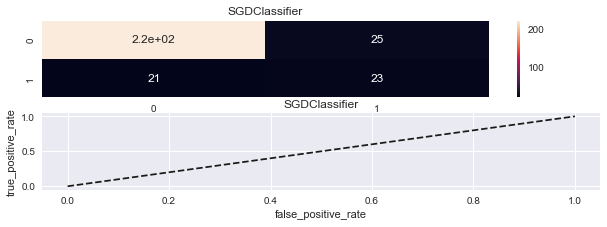

************** LogisticRegression ***********


LogisticRegression()


accuracy score 0.8625429553264605
Cross-val-score= 0.8896551724137931


roc_auc_score 0.5921512697828487


              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.64      0.20      0.31        44

    accuracy                           0.86       291
   macro avg       0.76      0.59      0.62       291
weighted avg       0.84      0.86      0.83       291



[[242   5]
 [ 35   9]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


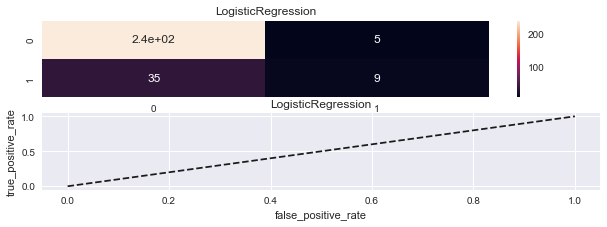

In [32]:
#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10)
    # ---------------------------------------------------------------------------------------------------------
    
    cv=model_selection.cross_val_score(model,x_train,y_train,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    # ---------------------------------------------------------------------------------------------------------
        
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred, pos_label=2)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

In [33]:
result=pd.DataFrame({'Model':Model, 'cvs' :cvs, 'score' :score, 'rocscore' :rocscore}, columns=['Model', 'cvs','score','rocscore'])


In [34]:
result

Model        cvs      score   rocscore
0  DecisionTreeClassifier  88.103448  83.161512  69.534413
1  RandomForestClassifier  91.120690  90.034364  70.781192
2    KNeighborsClassifier  87.155172  89.690722  71.512698
3           SGDClassifier  84.482759  84.192440  71.075635
4      LogisticRegression  88.965517  86.254296  59.215127

# Keeping Random State varying